In [1]:
## First Trial
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
d=pd.read_table(r'C:\Users\Tanvir Khan\Desktop\fruit.txt')
# removing NA
d['color_score']=d['color_score'].fillna(.59)
d.tail()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116.0,6.1,8.5,0.71
55,4,lemon,unknown,116.0,6.3,7.7,0.72
56,4,lemon,unknown,116.0,5.9,8.1,0.73
57,4,lemon,unknown,152.0,6.5,8.5,0.72
58,4,lemon,unknown 118,6.1,8.1,0.7,0.59


In [2]:
d.shape[0]

59

In [3]:
X=d[['mass', 'width', 'height', 'color_score']]
y=d['fruit_label']

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, test_size=.25)

X_train.shape
y_train.shape
type(y_train)
y=pd.DataFrame(y_train)
y.head()
y.shape
#Z=X_train
#Z.loc[:,'NEW']=Z.height-Z.width
#Z.head()
type(y_train)
X_train.shape
y_train.shape

X_train.head()

#X_train.dtypes

#y_train.dtypes

,mass,width,height,color_score
42,154.0,7.2,7.2,0.82
48,174.0,7.3,10.1,0.72
7,76.0,5.8,4.0,0.81
14,152.0,7.6,7.3,0.69
32,164.0,7.2,7.0,0.80


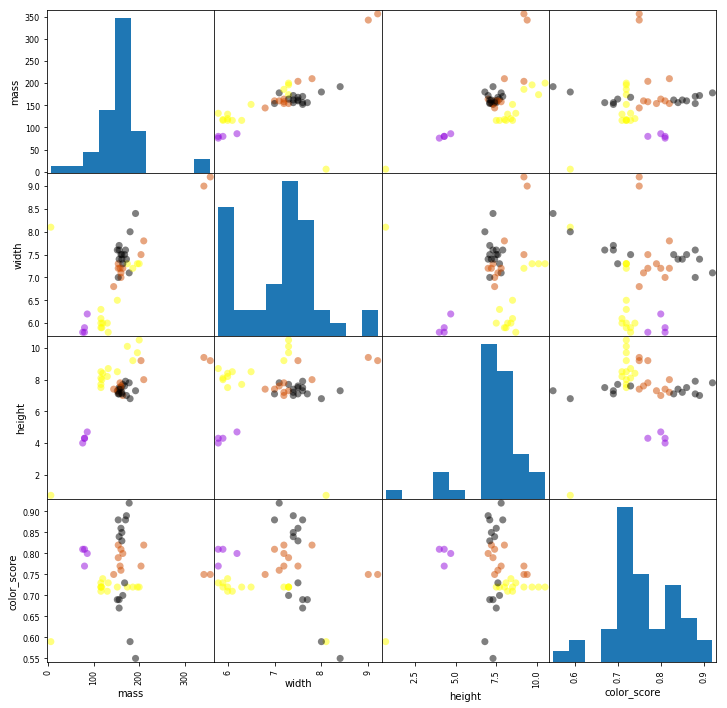

In [4]:
# scatter matrix plot using matplotlib
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
sct=pd.plotting.scatter_matrix(X_train, c=y_train, cmap=cmap,figsize=(12,12), marker='o', s=50)

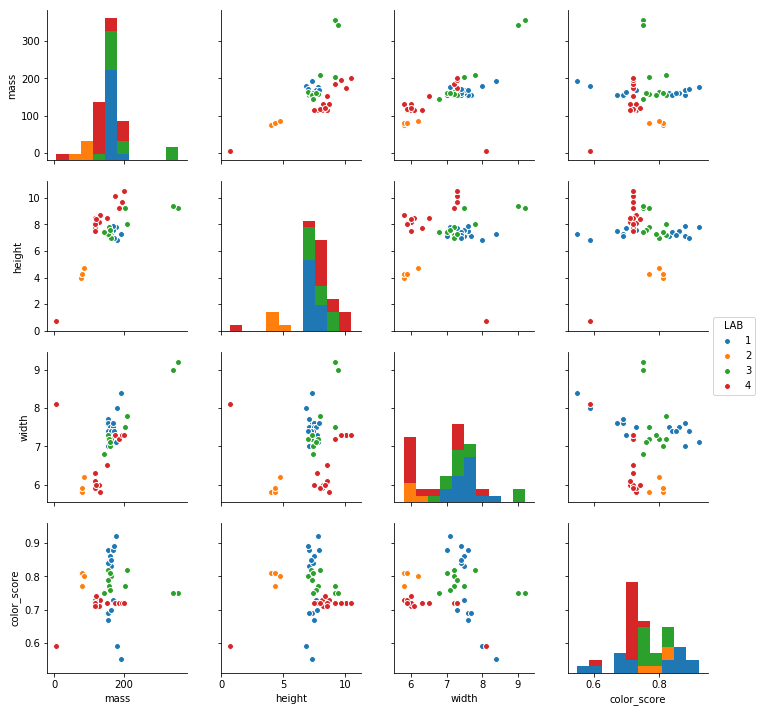

In [5]:
# scatterplot matrix using seaborn
import seaborn as sns
X_t=X_train.copy()
X_t.loc[:,'LAB']=y_train
#sns.set(style="ticks")
sns.pairplot(X_t, x_vars=['mass','height','width','color_score'], y_vars=['mass','height','width','color_score'], hue='LAB')

In [6]:
d=pd.read_table(r'C:\Users\Tanvir Khan\Desktop\fruit.txt')

X=d[['mass','width','height']]
y=d['fruit_label']

# train test split
X_train,X_test,y_train, y_test=train_test_split(X, y, random_state=0)

In [7]:
d.head(25)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79
5,2,mandarin,mandarin,80.0,5.8,4.3,0.77
6,2,mandarin,mandarin,80.0,5.9,4.3,0.81
7,2,mandarin,mandarin,76.0,5.8,4.0,0.81
8,1,apple,braeburn,178.0,7.1,7.8,0.92
9,1,apple,braeburn,172.0,7.4,7.0,0.89


In [8]:
# create a dictionary
lookup_fruit_name=dict(zip(d.fruit_label.unique(), d.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [9]:
# import knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) # how many nearest neigobors will the algorithm consider for classification
# train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
# assess the performance on test set
knn.score(X_test, y_test)

0.5333333333333333

In [11]:
# predict a single instance
fp=knn.predict([[500, 10, 8]])
lookup_fruit_name[fp[0]] # it predicts the label (a number) from it lookup the fruit name 

'orange'

In [12]:
fj=knn.predict([[10, 2, 7]])
lookup_fruit_name[fj[0]]

'mandarin'

In [13]:
#from adspy_shared_utilities import plot_fruit_knn
#plot_fruit_knn(X_train, y_train, 5, 'uniform')

## this tool is a customized tool, copy and paste it from the downloadable mateirals forlder